In [6]:
import math
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns

import sys  
sys.path.insert(0, '/Documents/NeuroScience-Master/signal_processing/ex2')

import code_part1


## 1.  Paper assignment: Cross correlation for evaluating spatial propagation


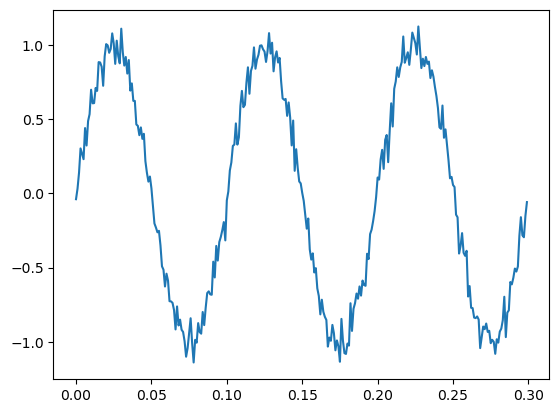

In [7]:
# simulate data for 15 seconsds
duration = 15
sample = 1000
samp_rate = 1/sample

# create the signal with transition to high positive to high negative in 50ms

t = 0.3 # second
freq = 10 # in hertz
omega = 2*np.pi*freq # angular frequency for sine waves

time = np.arange(t*sample)*samp_rate
sin_amp = np.sin(omega*time)

# Adding noise using target SNR
x_watts = sin_amp ** 2
# Set a target SNR
target_snr_db = 20
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
y_volts = sin_amp + noise_volts


plt.plot(time,y_volts)

In [8]:
signal = y_volts
ms_count = 300
grid_size = 10
middle_cell = (grid_size / 2 - 1, grid_size / 2 - 1)

In [9]:
propagation_delay_matrix = np.array([
    [80., 75., 70., 65., 60., 65., 70., 75., 80., 105.],
    [75., 55., 50., 45., 40., 45., 50., 55., 75., 100.],
    [70., 50., 35., 30., 25., 30., 35., 50., 70., 95.],
    [65., 45., 30., 15., 10., 15., 30., 45., 65., 90.],
    [60., 40., 25., 10., 0., 10., 25., 40., 60., 85.],
    [65., 45., 30., 15., 10., 15., 30., 45., 65., 90.],
    [70., 50., 30., 30., 25., 30., 35., 50., 70., 95.],
    [75., 55., 50., 45., 40., 45., 50., 55., 75., 100.],
    [80., 75., 70., 65., 60., 65., 70., 75., 80., 105.],
    [105., 100., 95., 90., 85., 90., 95., 100., 105., 110.]
], dtype="int")
print("propagation_delay_matrix:")
propagation_delay_matrix

propagation_delay_matrix:


array([[ 80,  75,  70,  65,  60,  65,  70,  75,  80, 105],
       [ 75,  55,  50,  45,  40,  45,  50,  55,  75, 100],
       [ 70,  50,  35,  30,  25,  30,  35,  50,  70,  95],
       [ 65,  45,  30,  15,  10,  15,  30,  45,  65,  90],
       [ 60,  40,  25,  10,   0,  10,  25,  40,  60,  85],
       [ 65,  45,  30,  15,  10,  15,  30,  45,  65,  90],
       [ 70,  50,  30,  30,  25,  30,  35,  50,  70,  95],
       [ 75,  55,  50,  45,  40,  45,  50,  55,  75, 100],
       [ 80,  75,  70,  65,  60,  65,  70,  75,  80, 105],
       [105, 100,  95,  90,  85,  90,  95, 100, 105, 110]])

In [10]:
signal_propagation_timeline = []

for t in range(0, ms_count):
    signal_propagation_t = np.zeros(shape=(grid_size, grid_size), dtype="float")

    for i in range(grid_size):
        for j in range(grid_size):
            electrode_delay = propagation_delay_matrix[i][j]
            
            if t >= electrode_delay:
                signal_propagation_t[i][j] = signal[t - electrode_delay]
    
    np.around(signal_propagation_t, decimals=3, out=signal_propagation_t) 
    signal_propagation_timeline.append(signal_propagation_t)

In [11]:
np.save('generated_data.npy', np.array(signal_propagation_timeline, dtype=object), allow_pickle=True)
b = np.load('generated_data.npy', allow_pickle=True)
b

array([[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],

       [[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],

       [[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],

       ...,

       [[1.057, 0.966, 1.124, ..., 0.966, 1.057, -0.623],
        [0.966, 0.435, 0.223, ..., 0.435, 0.966, -0.188],
        [1.124, 

MovieWriter ffmpeg unavailable; using Pillow instead.


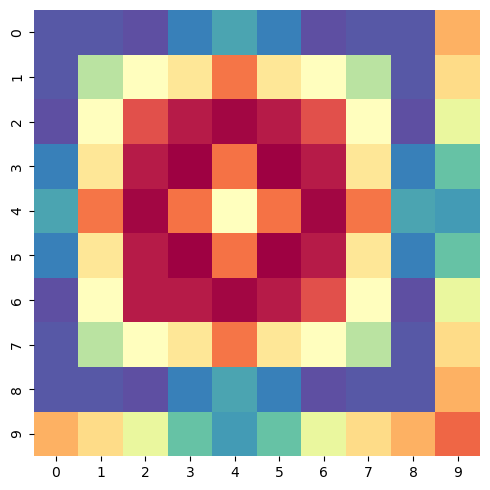

In [6]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
dimension = (5, 5)

def init():
    sns.heatmap(np.zeros(dimension), vmax=.8, cbar=False)

def animate(i):
    sns.heatmap(signal_propagation_timeline[i], vmin=-1, vmax=1, center=0, cmap="Spectral", cbar=False)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=ms_count, repeat=False)
anim.save('./signal_propagation.gif')

In [15]:
'''
helper function: 
calculate the neighbors according to a specific distance d from a start point electrod
'''
def get_cluster(d,middle):
    cluster = []
    for i in range(-d,d+1):
        if i**2 - d**2 != 0:
            cluster.append((middle[0]+i,middle[1]-d))
            cluster.append((middle[0]+i,middle[1]+d))
        for j in range(-d,d+1):
            if i**2 - d**2 == 0:
                cluster.append((middle[0]+i,middle[1]+j))
    return cluster

In [16]:
'''
This function get the electrodes matrix propagation timeline, and according to the time recording and the time lag
calculated the flow vector which includes the maxumum value of the cross corelation and it match delay time.
input: 
    1. electrodes matrix timeline
    2. recording time
    3. start electrode (the point we calculate the propagation from)
    4. cluster (the relevant neighbores)
    5. time lag window
output: 
    1. list of flow vector, each element in the cluster gets respectivly a vector 
        includes the max correlation value and the delay time.
    2. list of direction, from the start electrode we have we calculate the relevant direction
        for each element in the cluster.
'''

def evaluate_pairwise(signal_propagation_timeline, recording_time, start_electrode, cluster, time_lag_window):
    flow_vec_mat = []
    direction_vec = []
    time_lag_corr = np.arange(-time_lag_window,time_lag_window+1)
    start_signal = []
    
    # fill the start electrode timeline of the sifnal
    for t in np.arange(0, recording_time):
        start_signal.append(signal_propagation_timeline[t][start_electrode[0]][start_electrode[1]])
    
    # for each cluster element fill the timeline of the signal
    for c in cluster:
        signal_propagation = []
        direction_vec.append([c[0]-start_electrode[0],c[1]-start_electrode[1]]) # calculate the direction
        
        for t in np.arange(0, recording_time):
            signal_propagation.append(signal_propagation_timeline[t][int(c[0])][int(c[1])])
            
        
        # calculate the cross correlation values
        cross_c = sig.correlate(signal_propagation, start_signal)
        cross_c = cross_c[len(start_signal)-time_lag_window:len(start_signal)+time_lag_window]
        cross_max_val = np.max(cross_c)
        cross_delay_val = np.argmax(cross_c)
        flow_vec_mat.append([cross_max_val,cross_delay_val])
        
    return flow_vec_mat,direction_vec

In [17]:
start_electrode = (4,4)
d1 = 1
d2 = 2
d3 = 3
cluster = get_cluster(d2,start_electrode)
propagation_mat = signal_propagation_timeline
time_lag_window = 50
recording_time = 80

In [18]:
'''
This function running on all electrod and calculate the evaluate_pairwaise for each one. 
It calculated the translation matrix according to the flow vectors and the directions and plot it.
This function calculate the cluster for each electrode using a helper function - "get_cluster".
input:
    1. electrodes matrix timeline
    2. recording time
    3. start electrode (the point we calculate the propagation from)
    4. time lag window
output:
    plot of the electrodes grid flow according time lag

'''
def running_our_data(signal_propagation_timeline, recording_time, start_electrode, time_lag_window):

    corr_matrix = np.zeros(shape=(10, 10))
    delay_matrix = np.zeros(shape=(10, 10))
    directions_matrix_x = np.zeros(shape=(10, 10))
    directions_matrix_y = np.zeros(shape=(10, 10))
    
    # looping on all electrode to create all possible neighbores
    for i in range(1,10 - 1):
        for j in range(1,10 - 1):
            source = (i,j)
            cluster = get_cluster(d=1, middle=source)
            # calculate the flow vectors and directions
            flow_vector,direction = code_part1.evaluate_pairwise(signal_propagation_timeline, recording_time,
                                                                      source, cluster, time_lag_window)

            # for each electrode find the maximum affected correlation and delay 
            for p_idx, p in enumerate(cluster):
                existing_corr = corr_matrix[p[0]][p[1]]
                p_corr = flow_vector[p_idx][0]
                p_delay = flow_vector[p_idx][1]
                d = np.array(p) - np.array(start_electrode)

                if p_corr > existing_corr:
                    corr_matrix[p[0]][p[1]] = p_corr
                    delay_matrix[p[0]][p[1]] = p_delay
                    # normelaize the direction with the corr and the delay
                    directions_matrix_x[p[0]][p[1]] = (p_corr * p_delay) / d[1] if d[1] != 0 else 0
                    directions_matrix_y[p[0]][p[1]] = (p_corr * p_delay) / d[0] if d[0] != 0 else 0
    
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    ax = plt.quiver(np.arange(0,10),np.arange(0,10), directions_matrix_x, directions_matrix_y, pivot="middle")   

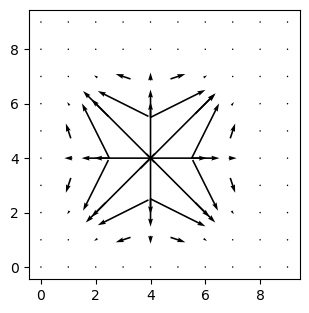

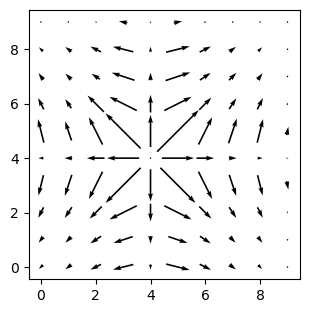

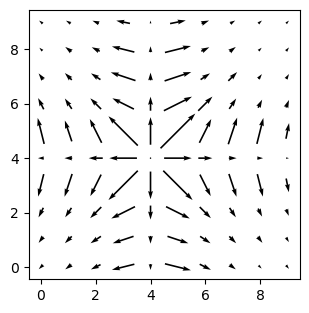

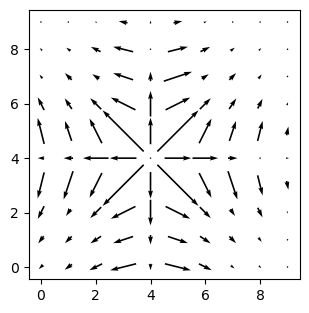

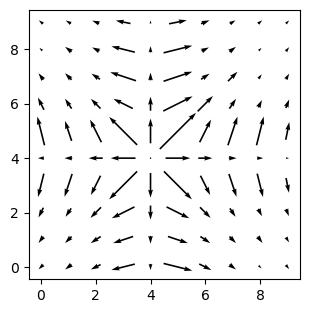

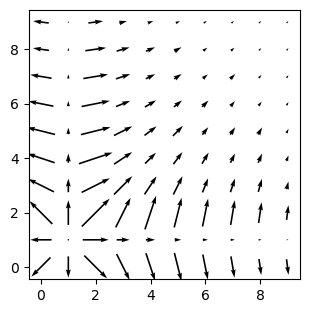

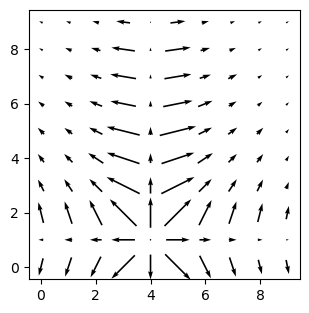

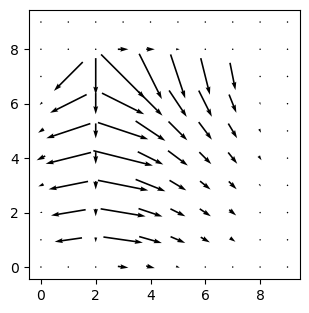

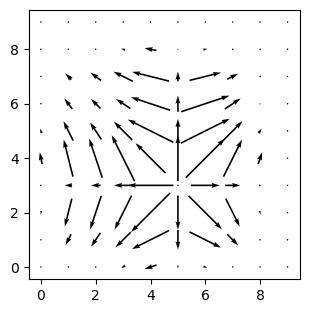

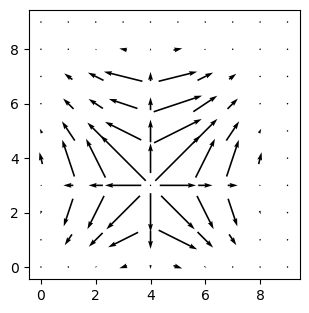

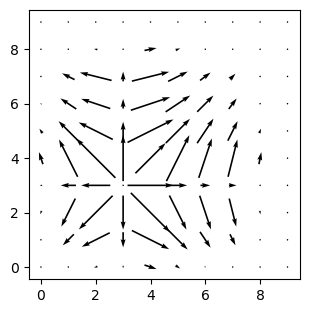

In [20]:

code_part1.running_our_data(b, 60, (4,4), 50)
running_our_data(signal_propagation_timeline, 110, (4,4), 50)
running_our_data(signal_propagation_timeline, 150, (4,4), 50)

running_our_data(signal_propagation_timeline, 110, (4,4), 10)
running_our_data(signal_propagation_timeline, 150, (4,4), 30)


running_our_data(signal_propagation_timeline, 150, (1,1), 100)
running_our_data(signal_propagation_timeline, 150, (1,4), 100)
running_our_data(signal_propagation_timeline, 80, (8,2), 80)

running_our_data(signal_propagation_timeline, 80, (3,5), 30)
running_our_data(signal_propagation_timeline, 80, (3,4), 30)
running_our_data(signal_propagation_timeline, 80, (3,3), 30)

